<a href="https://colab.research.google.com/github/harshit7271/Deep_learning_with_PyTorch/blob/main/Neural_Network_Classification_in_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Neural Network Classification with PyTorch**
Classification is a problem of predicting whether something is one thing or another (there can be multiple things as the options).

* **Book version of this notebook** - http://www.learnpytorch.io/02_pytorch_classification/

# **1. Make classification data and get it ready**

In [1]:
import sklearn

In [2]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, noise = 0.03, random_state = 42)

In [3]:
len(X), len(y)

(1000, 1000)

In [4]:
print(f"first 5 samples of X : \n {X[:5]}")
print(f"first 5 samples of y :\n {y[:5]}")

first 5 samples of X : 
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
first 5 samples of y :
 [1 1 1 1 0]


In [5]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1" : X[:, 0],
                        "X2" : X[:, 1],
                        "label" : y})

circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


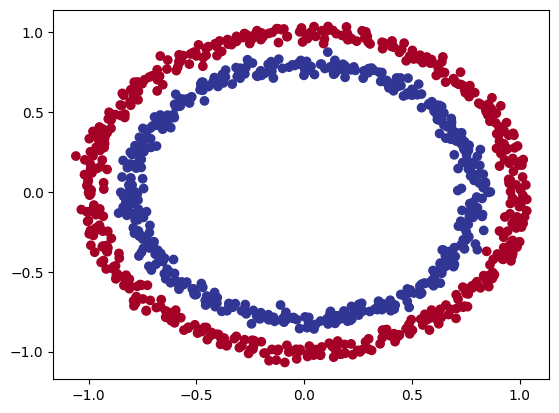

In [6]:
# Let's visualize the data
import matplotlib.pyplot as plt
plt.scatter(x = X[:, 0],
            y = X[:, 1],
            c = y,
            cmap = plt.cm.RdYlBu)

## ***NOTE :*** *The data we're working with is often reffered as a toy dataset, a dataset that is small enough to experiment but still sizeable enough to practice the fundamentals*

### **1.1 Check input and outputs shape**

In [7]:
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
# view the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X : {X_sample} and the same for y : {y_sample}")
print(f"Shape for X : {X_sample.shape} and for y : {y_sample.shape}")

Values for one sample of X : [0.75424625 0.23148074] and the same for y : 1
Shape for X : (2,) and for y : ()


### **1.2 Turn data into tensors and create train and test splits**

In [9]:
import torch
torch.__version__

'2.8.0+cu126'

In [10]:
type(X), X.dtype, type(y), y.dtype

(numpy.ndarray, dtype('float64'), numpy.ndarray, dtype('int64'))

In [11]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [12]:
type(X), X.dtype, type(y), y.dtype

(torch.Tensor, torch.float32, torch.Tensor, torch.float32)

In [13]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X_train, X_train.shape

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         ...,
         [ 0.0157, -1.0300],
         [ 1.0110,  0.1680],
         [ 0.5578, -0.5709]]),
 torch.Size([800, 2]))

In [15]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [16]:
n_samples

1000

# **2. Building a model**

Let's build a model to classify our blue and red dots.

To do so, we want to :
* Setup device agnostic code so our code will run on an accelator(GPU) if there is one
* Construct a model (by subclassing `nn.Module`)
* Define a **loss function** and **optimizer**
* Create a training and testing loop

In [17]:
import torch
from torch import nn


# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

**Now we've setup device agnostic code, let's create a model that :**
1. Subclass `nn.Module` (almost all models in PyTorch subclass `nn.Module`)
2. Create 2 `nn.Linear()` layers that are capable of handling shapes of our data
3. Define a `forward()` method that outlines the forward forward pass(or forward computation) of the model
4. Instatiate an instance of our model class and send it to the target `device`

In [18]:
from sklearn import datasets
# Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module) :
  def __init__(self):
    super().__init__()
    # Create 2 nn.Linear layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=5)    # takes in 2 features and upscales to 5 features
    self.layer_2 = nn.Linear(in_features=5, out_features=1)    # takes in 5 feautres from previous layers and outputs a single feature (same shape as y)

  # Define a forward method that outlines the forward pass
  def forward(self, x):
    return self.layer_2(self.layer_1(x))   # x -> layer_1 -> layer_2 -> output

  # Instantiate an instance of our model class and send it to target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [19]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [20]:
# Let's replicate the model above using nn.Sequestial()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [21]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.3645,  0.2768],
                      [ 0.6075,  0.6617],
                      [ 0.5488,  0.4812],
                      [-0.1294,  0.3772],
                      [ 0.0063, -0.6868]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6581,  0.1867,  0.2882,  0.2161,  0.6131], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.3335,  0.2186, -0.3129,  0.4106,  0.3633]], device='cuda:0')),
             ('1.bias', tensor([-0.0280], device='cuda:0'))])

In [22]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"length of predictions : {len(untrained_preds)}")
print(f"shape of predictions : {untrained_preds.shape}")
print(f"\nLength of test samples : {len(X_test)}, shape : {X_test.shape}")
print(f"\nFirst 10 predictions : {torch.round(untrained_preds[:10])}")
print(f"\n First 10 actual labels : {y_test[:10]}")

length of predictions : 200
shape of predictions : torch.Size([200, 1])

Length of test samples : 200, shape : torch.Size([200, 2])

First 10 predictions : tensor([[-0.],
        [0.],
        [-0.],
        [-0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [-0.],
        [0.]], device='cuda:0')

 First 10 actual labels : tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### **2.1 Set up `loss function` and `optimizer`**

Different problem types require different loss functions.

For example, for a regression problem (predicting a number) you might use mean absolute error (MAE) loss.

And for a binary classification problem (like ours), you'll often use [binary cross entropy](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a) as the loss function.

However, the same optimizer function can often be used across different problem spaces.

For example, the stochastic gradient descent optimizer (SGD, `torch.optim.SGD()`) can be used for a range of problems, and the same applies to the Adam optimizer (`torch.optim.Adam()`).

| Loss function/Optimizer | Problem type | PyTorch Code |
| ----- | ----- | ----- |
| Stochastic Gradient Descent (SGD) optimizer | Classification, regression, many others. | [`torch.optim.SGD()`](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html) |
| Adam Optimizer | Classification, regression, many others. | [`torch.optim.Adam()`](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html) |
| Binary cross entropy loss | Binary classification | [`torch.nn.BCELossWithLogits`](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html) or [`torch.nn.BCELoss`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) |
| Cross entropy loss | Multi-class classification | [`torch.nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) |
| Mean absolute error (MAE) or L1 Loss | Regression | [`torch.nn.L1Loss`](https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html) |
| Mean squared error (MSE) or L2 Loss | Regression | [`torch.nn.MSELoss`](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html#torch.nn.MSELoss) |  

*Table of various loss functions and optimizers, there are more but these are some common ones you'll see.*

Since we're working with a binary classification problem, let's use a binary cross entropy loss function.

> **Note:** Recall a **loss function** is what measures how *wrong* your model predictions are, the higher the loss, the worse your model.
>
> Also, PyTorch documentation often refers to loss functions as "loss criterion" or "criterion", these are all different ways of describing the same thing.

PyTorch has two binary cross entropy implementations:
1. [`torch.nn.BCELoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) - Creates a loss function that measures the binary cross entropy between the target (label) and input (features).
2. [`torch.nn.BCEWithLogitsLoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html) - This is the same as above except it has a sigmoid layer ([`nn.Sigmoid`](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html)) built-in (we'll see what this means soon).

Which one should you use?

The [documentation for `torch.nn.BCEWithLogitsLoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html) states that it's more numerically stable than using `torch.nn.BCELoss()` after a `nn.Sigmoid` layer.

So generally, implementation 2 is a better option. However for advanced usage, you may want to separate the combination of `nn.Sigmoid` and `torch.nn.BCELoss()` but that is beyond the scope of this notebook.

Knowing this, let's create a loss function and an optimizer.

For the optimizer we'll use `torch.optim.SGD()` to optimize the model parameters with learning rate 0.1.

> **Note:** There's a [discussion on the PyTorch forums about the use of `nn.BCELoss` vs. `nn.BCEWithLogitsLoss`](https://discuss.pytorch.org/t/bceloss-vs-bcewithlogitsloss/33586/4). It can be confusing at first but as with many things, it becomes easier with practice.

In [23]:
 # Set up the loss function
 # loss_fn = nn.BCELoss()
 # BCELoss = requires inputs to have gone through the sigmoid activation
'''
nn.Sequential(
    nn.Sigmoid(),
    nn.BCELoss()                # this does the same work as nn.BCEWithLogitsLoss()
)
'''
loss_fn = nn.BCEWithLogitsLoss()     # BCEWithLogitsLoss = sigmoid activation function built-in

optimizer = torch.optim.SGD(params = model_0.parameters(),lr = 0.01)

In [24]:
# CALCULATE  ACCURACY - out of 100 what percentage our model gets it right

def accuracy_fn(y_true, y_pred) :
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

# **3. Train Model**
To train our model, we're going to need to build a training a loop with the following steps:
1. Forward pass
2. Claculate the loss
3. Optimizer zero grad
4. Loss backward (Backward Propagation)
5. Optimizer step (Gradient Descent)

### **3.1 Going from raw logits -> predictions(using activation functions) -> prediction tabels**

our model outputs are going to be raw **logits**

we can convert these **logit** into **prediction probability** by passing them to some kind of activation function (e.g sigmoid for binary classification and softmax for multiclass classification).

then can convert our model's prediction probabilities to **predicction labels** by eiher rounding them or taking the `argmax()`

In [25]:
# view the first 5 outputs of the forward pass on the test data
model_0.eval()         # whenever we make predictions with our model, we turn it in eval model
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits                 # Logits are raw outputs of our model without being passed through any ACTIVATION function, whatever comes after the activation functions

tensor([[-0.0029],
        [ 0.0072],
        [-0.0051],
        [-0.0024],
        [ 0.0336]], device='cuda:0')

In [26]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [27]:
# use sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_prob = torch.sigmoid(y_logits)
y_pred_prob

tensor([[0.4993],
        [0.5018],
        [0.4987],
        [0.4994],
        [0.5084]], device='cuda:0')

In [28]:
# Find the predicted labels
y_preds = torch.round(y_pred_prob)

# In full (logits -> pred probs -> pred labels)
y_preds_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check the equality
print(torch.eq(y_preds.squeeze(), y_preds_labels.squeeze()))

# Get rid of extra dimensions
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 1., 0., 0., 1.], device='cuda:0')

In [29]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

### **3.2 Building training and testing loop**

In [30]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 1000

# PUT DATA ON TARGET DEVICE
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Building training and evaluation loop
for epoch in range(epochs):
  ## Training
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))   # sigmoid activation function will convert the logits into prediction probabilities to prediction labels

  # 2. Calculate loss/accuracy
  """loss = loss_fn(torch.sigmoid(y_logits),  # nn.BCELoss expects prediction as input
                 y_train)"""


  loss = loss_fn(y_logits,   # nn.BCEWithLogitsLoss expects raw logits as input
                 y_train)
  acc = accuracy_fn(y_true = y_train, y_pred = y_pred)

  # Optimizer Zero Grad
  optimizer.zero_grad()

  # Loss backward (Back Propagation)
  loss.backward()

  # 5. Optimizer step(gradient descent)
  optimizer.step()

  ## Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward Pass
    test_logits = model_0(X_test).squeeze()                # Logits are raw output of our data with no modification
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. claculate the Test Loss
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true = y_test, y_pred = test_pred)

  # print out what's happening
  if epoch % 10 == 0 :
    print(f"Epoch : {epoch} | Loss : {loss:.5f} | Accuracy : {acc:.2f}% | Test Loss : {test_loss} | Test Accuracy : {test_acc:.2f}%")

Epoch : 0 | Loss : 0.69320 | Accuracy : 51.38% | Test Loss : 0.6933867335319519 | Test Accuracy : 53.00%
Epoch : 10 | Loss : 0.69319 | Accuracy : 51.88% | Test Loss : 0.6934124827384949 | Test Accuracy : 52.50%
Epoch : 20 | Loss : 0.69318 | Accuracy : 51.38% | Test Loss : 0.6934379935264587 | Test Accuracy : 52.00%
Epoch : 30 | Loss : 0.69317 | Accuracy : 51.62% | Test Loss : 0.6934632062911987 | Test Accuracy : 52.00%
Epoch : 40 | Loss : 0.69316 | Accuracy : 51.25% | Test Loss : 0.6934881210327148 | Test Accuracy : 51.00%
Epoch : 50 | Loss : 0.69315 | Accuracy : 51.62% | Test Loss : 0.6935126185417175 | Test Accuracy : 50.00%
Epoch : 60 | Loss : 0.69315 | Accuracy : 51.38% | Test Loss : 0.6935368180274963 | Test Accuracy : 51.00%
Epoch : 70 | Loss : 0.69314 | Accuracy : 51.25% | Test Loss : 0.6935606002807617 | Test Accuracy : 50.00%
Epoch : 80 | Loss : 0.69313 | Accuracy : 51.25% | Test Loss : 0.6935839653015137 | Test Accuracy : 51.00%
Epoch : 90 | Loss : 0.69313 | Accuracy : 51.25%

# **4. Make Prediction and evaluate the model**
it looks like our model isn't learning anything.

so to inspect it let's make some predictions and make them visual!

to do so, we are going to import a function called `plot_decision_boundary()`



In [31]:
import requests
from pathlib import Path

# download helper functions from Learn PyTorch repo (if it's not already dowloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary


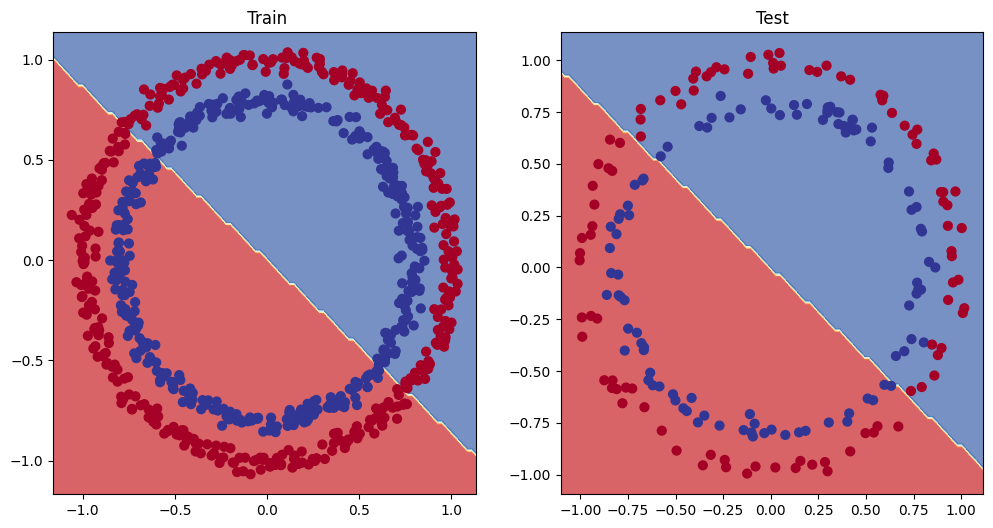

In [32]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title(" Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

# **5. Improving a model (from a model perspective)**
* Add more layers - Give model more chances to learn about pattern in the data
* Add more hidden layers (go from 5 to 10 hidden units)
* Fit for longer (more epochs).
* Changing the activation function
* Change the learning rate
* Change the loss function


***These options are all from model's perspective because they deal directly with the model, rather than the data***

* Because these options are all values we (as a machine learning engineers and data scientists) can change, they are refferd as **HYPERPARAMETERS**

Let's try and improve our model by:
* Adding more hidden units : 5 -> 10
* Increase the number of layers: 2 -> 3
* Increase the number of epochs: 100 -> 1000

In [33]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features = 10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features = 2)

def forward(self, x):
  # z= self.layer_1(x)
  # z = self.layer_2(z)
  # z = self.layer_3(z)
  return self.layer_3(self.layer_2(self.layer_1(x))) # this way of writing operations levarages speed ups where possible behind the scenes
model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=2, bias=True)
)

In [ ]:
# Create a loss function
loss_fn = nn.BCEWithLogitLoss()

# Create an Optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.1)

In [ ]:
# Write a training and evaluation loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)